In [1]:
# from langchain import PromptTemplate, OpenAI, LLMChain

# # 加载xlsx文件
# df = pd.read_excel("C:/Users/22100/Desktop/your_questions2.xlsx")
# llm = OpenAI(temperature=0)

# prompt_template = "{question}?"

# llm_chain = LLMChain(llm=llm, prompt=PromptTemplate.from_template(prompt_template))

# for index, row in df.iterrows():
#     question = row['question']
#     result = llm_chain(question)
#     print(result)
#     df.at[index, 'answers'] = result['text']

# df.to_excel("C:/Users/22100/Desktop/output_file_name.xlsx", index=False)

# Construction of Dataset

In [2]:
import pandas as pd
sep_df = pd.read_csv('../data/uspto_sep.csv').drop(columns=['Unnamed: 0'])

In [3]:
# from rdkit import Chem
# from rdkit.Chem import AllChem


# # reaction_smiles = "[C:1]-[O:2].[H:3][H].>>[C:1]=[O:2].[H:3][H]"
# reaction_smiles = "[CH3:1][c:2]1[n:3][c:4]2[c:5](=[O:6])[n:7](-[c:8]3[cH:9][cH:10][c:11]([Cl:12])[cH:13][cH:14]3)[c:15](-[c:16]3[cH:17][cH:18][c:19](-[c:20]4[cH:21][cH:22][cH:23][cH:24][cH:25]4)[cH:26][cH:27]3)[n:28][c:29]2[n:30]1-[c:31]1[cH:32][cH:33][cH:34][cH:35][cH:36]1.[CH3:45][C:46]([CH3:47])([C:48]#[N:49])[N:50]=[N:51][C:52]([CH3:53])([CH3:54])[C:55]#[N:56].[Cl:57][C:58]([Cl:59])([Cl:60])[Cl:61].[O:37]=[C:38]1[CH2:39][CH2:40][C:41](=[O:42])[N:43]1[Br:44]>> \
# [CH2:1]([c:2]1[n:3][c:4]2[c:5](=[O:6])[n:7]([c:8]3[cH:9][cH:10][c:11]([Cl:12])[cH:13][cH:14]3)[c:15]([c:16]3[cH:17][cH:18][c:19](-[c:20]4[cH:21][cH:22][cH:23][cH:24][cH:25]4)[cH:26][cH:27]3)[n:28][c:29]2[n:30]1[c:31]1[cH:32][cH:33][cH:34][cH:35][cH:36]1)[O:37][CH2:38][CH2:39][CH2:40][C:41](=[O:42])[NH:43][Br:44].[CH3:45][C:46]([CH3:47])([C:48]#[N:49])[N:50]=[N:51][C:52]([CH3:53])([CH3:54])[C:55]#[N:56].[Cl:57][C:58]([Cl:59])([Cl:60])[Cl:61]"
# reaction = AllChem.ReactionFromSmarts(reaction_smiles)
# reaction.Initialize()
# reacting_atoms = reaction.GetReactingAtoms()
# # product_template = reaction.GetProductTemplate()
# reacting_atoms

process the functional group

In [4]:
from rdkit import Chem

class FuncGroups:

    def __init__(self) -> None:
        self.dict_fgs = {
            "furan": "o1cccc1",
            "aldehydes": " [CX3H1](=O)[#6]",
            "esters": " [#6][CX3](=O)[OX2H0][#6]",
            "ketones": " [#6][CX3](=O)[#6]",
            "amides": " C(=O)-N",
            "thiol groups": " [SH]",
            "alcohol groups": " [OH]",
            "methylamide": "*-[N;D2]-[C;D3](=O)-[C;D1;H3]",
            "carboxylic acids": "*-C(=O)[O;D1]",
            "carbonyl methylester": "*-C(=O)[O;D2]-[C;D1;H3]",
            "terminal aldehyde": "*-C(=O)-[C;D1]",
            "amide": "*-C(=O)-[N;D1]",
            "carbonyl methyl": "*-C(=O)-[C;D1;H3]",
            "isocyanate": "*-[N;D2]=[C;D2]=[O;D1]",
            "isothiocyanate": "*-[N;D2]=[C;D2]=[S;D1]",
            "nitro": "*-[N;D3](=[O;D1])[O;D1]",
            "nitroso": "*-[N;R0]=[O;D1]",
            "oximes": "*=[N;R0]-[O;D1]",
            "Imines": "*-[N;R0]=[C;D1;H2]",
            "terminal azo": "*-[N;D2]=[N;D2]-[C;D1;H3]",
            "hydrazines": "*-[N;D2]=[N;D1]",
            "diazo": "*-[N;D2]#[N;D1]",
            "cyano": "*-[C;D2]#[N;D1]",
            "primary sulfonamide": "*-[S;D4](=[O;D1])(=[O;D1])-[N;D1]",
            "methyl sulfonamide": "*-[N;D2]-[S;D4](=[O;D1])(=[O;D1])-[C;D1;H3]",
            "sulfonic acid": "*-[S;D4](=O)(=O)-[O;D1]",
            "methyl ester sulfonyl": "*-[S;D4](=O)(=O)-[O;D2]-[C;D1;H3]",
            "methyl sulfonyl": "*-[S;D4](=O)(=O)-[C;D1;H3]",
            "sulfonyl chloride": "*-[S;D4](=O)(=O)-[Cl]",
            "methyl sulfinyl": "*-[S;D3](=O)-[C;D1]",
            "methyl thio": "*-[S;D2]-[C;D1;H3]",
            "thiols": "*-[S;D1]",
            "thio carbonyls": "*=[S;D1]",
            "halogens": "*-[#9,#17,#35,#53]",
            "t-butyl": "*-[C;D4]([C;D1])([C;D1])-[C;D1]",
            "tri fluoromethyl": "*-[C;D4](F)(F)F",
            "acetylenes": "*-[C;D2]#[C;D1;H]",
            "cyclopropyl": "*-[C;D3]1-[C;D2]-[C;D2]1",
            "ethoxy": "*-[O;D2]-[C;D2]-[C;D1;H3]",
            "methoxy": "*-[O;D2]-[C;D1;H3]",
            "side-chain hydroxyls": "*-[O;D1]",
            "ketones": "*=[O;D1]",
            "primary amines": "*-[N;D1]",
            "nitriles": "*#[N;D1]",
        }

    def _is_fg_in_mol(self, mol, fg):
        fgmol = Chem.MolFromSmarts(fg)
        mol = Chem.MolFromSmiles(mol.strip())
        return len(Chem.Mol.GetSubstructMatches(mol, fgmol, uniquify=True)) > 0

    def functional_groups(self, smiles):
        try:
            fgs_in_molec = [
                name
                for name, fg in self.dict_fgs.items()
                if self._is_fg_in_mol(smiles, fg)
            ]
            return ', '.join(fgs_in_molec)
        except:
            return "Invalid SMILES."

In [5]:
# # 创建FuncGroups的实例
# func_groups = FuncGroups()

# # 为DataFrame添加官能团描述列
# sep_df['reactants_functional_groups'] = sep_df['reactants'].apply(func_groups.functional_groups)
# sep_df['products_functional_groups'] = sep_df['products'].apply(func_groups.functional_groups)


In [6]:
sep_df

,reactants,reagents,products
0,CC(C)C[Mg+].CON(C)C(=O)c1ccc(O)nc1,C1CCOC1.[Cl-],CC(C)CC(=O)c1ccc(O)nc1
1,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21....,NaN,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)...,CC(C)=C(Cl)N(C)C.ClCCl.c1ccncc1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1.NCc1ccc(Cl)c(Cl)c1,NaN,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1
...,...,...,...
479030,COC(=O)NCC1Cc2c(Cl)cc3c(c2O1)CCC3,[Al+3].[H-].[H-].[H-].[H-].[Li+],CNCC1Cc2c(Cl)cc3c(c2O1)CCC3
479031,COc1cccc(C(=O)Cl)c1.COc1ccccc1OC,COc1ccc(C(=CC#N)c2ccc(OC)c(OC)c2)cc1.ClCCl.[Al...,COc1cccc(C(=O)c2ccc(OC)c(OC)c2)c1
479032,C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C(OC)OC)=C2C(=O)...,CC(C)=O.Cl,C#Cc1cccc(C2C(C(=O)OC)=C(C)NC(C=O)=C2C(=O)OC)c1
479033,CO.COc1ccc(CC(=O)c2ccc(O)cc2O)cc1,NaN,COc1ccc(CC(=O)c2ccc(OC)cc2O)cc1


In [7]:
sep_df = pd.read_csv('../data/uspto_sep_fg.csv').drop(columns=['Unnamed: 0'])

In [8]:
sep_df.head()

,reactants,reagents,products,reactants_fg,products_fg
0,CC(C)C[Mg+].CON(C)C(=O)c1ccc(O)nc1,C1CCOC1.[Cl-],CC(C)CC(=O)c1ccc(O)nc1,"['CC(C)C[Mg+]', 'CON(C)C(=O)c1ccc(O)nc1']",['CC(C)CC(=O)c1ccc(O)nc1']
1,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]']
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21....,NaN,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,['CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc2...,['CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)...
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)...,CC(C)=C(Cl)N(C)C.ClCCl.c1ccncc1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,['COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)...,['COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)...
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1.NCc1ccc(Cl)c(Cl)c1,NaN,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,"['Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1', 'NCc1ccc(Cl...",['Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2...


## Sample from USPTO sep

In [9]:
import pandas as pd

In [10]:
# sep_df = pd.read_csv('../data/uspto_sep.csv').drop(columns=['Unnamed: 0'])

In [11]:
# sep_df

In [12]:
uspto_50k = pd.read_csv('../data/uspto_50k.csv')[['reactants_smiles','products_smiles','reaction_type']]
uspto_50k

,reactants_smiles,products_smiles,reaction_type
0,CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(...,O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)...,heteroatom alkylation and arylation
1,COC(=O)c1cc(CCCc2cc3c(=O)[nH]c(N)nc3[nH]2)cs1,Nc1nc2[nH]c(CCCc3csc(C(=O)O)c3)cc2c(=O)[nH]1,deprotections
2,CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C.FC(F)(F)c...,CC1(C)OB(c2cccc(Nc3nccc(C(F)(F)F)n3)c2)OC1(C)C,functional group interconversion
3,CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)OCc1ccccc1,CC(C)(C)OC(=O)NCC(=O)CCC(=O)OCCCC(=O)O,deprotections
4,Fc1cc2c(Cl)ncnc2cn1.NC1CCCCCC1,Fc1cc2c(NC3CCCCCC3)ncnc2cn1,heteroatom alkylation and arylation
...,...,...,...
50032,Cc1cc([N+](=O)[O-])ccc1O.Nc1cc(Cl)ccn1,Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1,heteroatom alkylation and arylation
50033,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)OC(C)(C)C)CC3,COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3,deprotections
50034,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(=...,COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...,reductions
50035,C=C(C)Cn1nc(C)c(Br)c1-c1ccc(F)cc1.OO,Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br,functional group addition (FGA)


In [13]:
prod_merge = pd.merge(sep_df, uspto_50k, how='inner', left_on='products', right_on='products_smiles')
prod_merge

,reactants,reagents,products,reactants_fg,products_fg,reactants_smiles,products_smiles,reaction_type
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]'],CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation
1,CN.O=C(O)c1ccc(F)c([N+](=O)[O-])c1,CN(C)C=O.O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],"['CN', 'O=C(O)c1ccc(F)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]'],CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,"['CC(N)c1ccc(F)c(Cl)c1', 'O=C(N1CCc2ccc(Cl)c(O...",['CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc...,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation
3,CC(=O)Nc1ccc(C=O)cc1,CCOC(C)=O.CO.[BH4-].[Na+],CC(=O)Nc1ccc(CO)cc1,['CC(=O)Nc1ccc(C=O)cc1'],['CC(=O)Nc1ccc(CO)cc1'],CC(=O)Nc1ccc(COC(C)=O)cc1,CC(=O)Nc1ccc(CO)cc1,deprotections
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,['CC(=O)Nc1ccc(COC(C)=O)cc1'],['CC(=O)Nc1ccc(CO)cc1'],CC(=O)Nc1ccc(COC(C)=O)cc1,CC(=O)Nc1ccc(CO)cc1,deprotections
...,...,...,...,...,...,...,...,...
31740,CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,C1CCOC1.CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O.C...,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,"['CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C', 'CCC=O']",['CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1'],CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,heteroatom alkylation and arylation
31741,CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,C1COCCO1.Cl[Pd]Cl.c1ccc(P(c2ccccc2)c2ccccc2)cc...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,"['CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C', 'COC(=O)c...",['COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N'],CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,C-C bond formation
31742,Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,C1CCNCC1.CN(C)C=O,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,"['Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1', 'O=C1CSC(=O...",['Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1'],Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,C-C bond formation
31743,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,C1CCOC1.CO.Cl.O.[Na+].[OH-],CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,deprotections


In [14]:
df = prod_merge[prod_merge['reactants_smiles'] == prod_merge['reactants']]
uspto_sample = df[['reactants','reagents', 'products','reaction_type','reactants_fg','products_fg']] # TODO, here to adjust the columns =============
uspto_sample

,reactants,reagents,products,reaction_type,reactants_fg,products_fg
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation,"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]']
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation,"['CC(N)c1ccc(F)c(Cl)c1', 'O=C(N1CCc2ccc(Cl)c(O...",['CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc...
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,deprotections,['CC(=O)Nc1ccc(COC(C)=O)cc1'],['CC(=O)Nc1ccc(CO)cc1']
5,CNC.Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1,CO,CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1,heteroatom alkylation and arylation,"['CNC', 'Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1']",['CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1']
6,CCOC(=O)c1ccc(F)cc1OC.Oc1ccc(Br)c(C2OCCO2)c1,CCOC(C)=O.CS(C)=O.O=C([O-])[O-].[K+].[K+],CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC,heteroatom alkylation and arylation,"['CCOC(=O)c1ccc(F)cc1OC', 'Oc1ccc(Br)c(C2OCCO2...",['CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC']
...,...,...,...,...,...,...
31740,CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,C1CCOC1.CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O.C...,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,heteroatom alkylation and arylation,"['CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C', 'CCC=O']",['CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1']
31741,CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,C1COCCO1.Cl[Pd]Cl.c1ccc(P(c2ccccc2)c2ccccc2)cc...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,C-C bond formation,"['CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C', 'COC(=O)c...",['COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N']
31742,Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,C1CCNCC1.CN(C)C=O,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,C-C bond formation,"['Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1', 'O=C1CSC(=O...",['Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1']
31743,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,C1CCOC1.CO.Cl.O.[Na+].[OH-],CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,deprotections,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...


In [15]:
uspto_sample.drop_duplicates(subset=['reactants','reagents', 'products'], inplace=True)

C:\Users\22100\AppData\Local\Temp\ipykernel_95096\1918060243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uspto_sample.drop_duplicates(subset=['reactants','reagents', 'products'], inplace=True)


In [16]:
uspto_sample

,reactants,reagents,products,reaction_type,reactants_fg,products_fg
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation,"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]']
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation,"['CC(N)c1ccc(F)c(Cl)c1', 'O=C(N1CCc2ccc(Cl)c(O...",['CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc...
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,deprotections,['CC(=O)Nc1ccc(COC(C)=O)cc1'],['CC(=O)Nc1ccc(CO)cc1']
5,CNC.Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1,CO,CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1,heteroatom alkylation and arylation,"['CNC', 'Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1']",['CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1']
6,CCOC(=O)c1ccc(F)cc1OC.Oc1ccc(Br)c(C2OCCO2)c1,CCOC(C)=O.CS(C)=O.O=C([O-])[O-].[K+].[K+],CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC,heteroatom alkylation and arylation,"['CCOC(=O)c1ccc(F)cc1OC', 'Oc1ccc(Br)c(C2OCCO2...",['CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC']
...,...,...,...,...,...,...
31740,CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,C1CCOC1.CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O.C...,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,heteroatom alkylation and arylation,"['CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C', 'CCC=O']",['CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1']
31741,CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,C1COCCO1.Cl[Pd]Cl.c1ccc(P(c2ccccc2)c2ccccc2)cc...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,C-C bond formation,"['CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C', 'COC(=O)c...",['COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N']
31742,Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,C1CCNCC1.CN(C)C=O,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,C-C bond formation,"['Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1', 'O=C1CSC(=O...",['Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1']
31743,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,C1CCOC1.CO.Cl.O.[Na+].[OH-],CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,deprotections,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...


In [17]:
uspto_sample_ = uspto_sample.drop_duplicates(subset="reactants", keep="first")
uspto_sample_

,reactants,reagents,products,reaction_type,reactants_fg,products_fg
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation,"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]']
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation,"['CC(N)c1ccc(F)c(Cl)c1', 'O=C(N1CCc2ccc(Cl)c(O...",['CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc...
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,deprotections,['CC(=O)Nc1ccc(COC(C)=O)cc1'],['CC(=O)Nc1ccc(CO)cc1']
5,CNC.Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1,CO,CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1,heteroatom alkylation and arylation,"['CNC', 'Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1']",['CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1']
6,CCOC(=O)c1ccc(F)cc1OC.Oc1ccc(Br)c(C2OCCO2)c1,CCOC(C)=O.CS(C)=O.O=C([O-])[O-].[K+].[K+],CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC,heteroatom alkylation and arylation,"['CCOC(=O)c1ccc(F)cc1OC', 'Oc1ccc(Br)c(C2OCCO2...",['CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC']
...,...,...,...,...,...,...
31740,CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,C1CCOC1.CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O.C...,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,heteroatom alkylation and arylation,"['CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C', 'CCC=O']",['CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1']
31741,CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,C1COCCO1.Cl[Pd]Cl.c1ccc(P(c2ccccc2)c2ccccc2)cc...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,C-C bond formation,"['CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C', 'COC(=O)c...",['COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N']
31742,Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,C1CCNCC1.CN(C)C=O,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,C-C bond formation,"['Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1', 'O=C1CSC(=O...",['Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1']
31743,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,C1CCOC1.CO.Cl.O.[Na+].[OH-],CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,deprotections,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...


In [18]:
uspto_sample_ = uspto_sample_[uspto_sample_['reagents'].notnull()]

In [19]:
uspto_sample_.value_counts('reaction_type')

reaction_type
heteroatom alkylation and arylation    5262
acylation and related processes        3595
deprotections                          2846
reductions                             2001
C-C bond formation                     1523
functional group interconversion        678
oxidations                              335
functional group addition (FGA)         113
heterocycle formation                    62
protections                              48
Name: count, dtype: int64

# sample method

### 抽样

####  molecular mass 


In [20]:
from rdkit.Chem import Descriptors
from rdkit import Chem
import statistics

def calculate_mean_molecular_weight(smiles_string):
    molecules = [Chem.MolFromSmiles(s) for s in smiles_string.split('.')]
    molecular_weights = [Descriptors.MolWt(mol) for mol in molecules]
    mean_molecular_weight = statistics.mean(molecular_weights)
    
    return mean_molecular_weight

uspto_sample_['reactants_weights'] = uspto_sample_['reactants'].apply(calculate_mean_molecular_weight)

C:\Users\22100\AppData\Local\Temp\ipykernel_95096\4228553171.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uspto_sample_['reactants_weights'] = uspto_sample_['reactants'].apply(calculate_mean_molecular_weight)


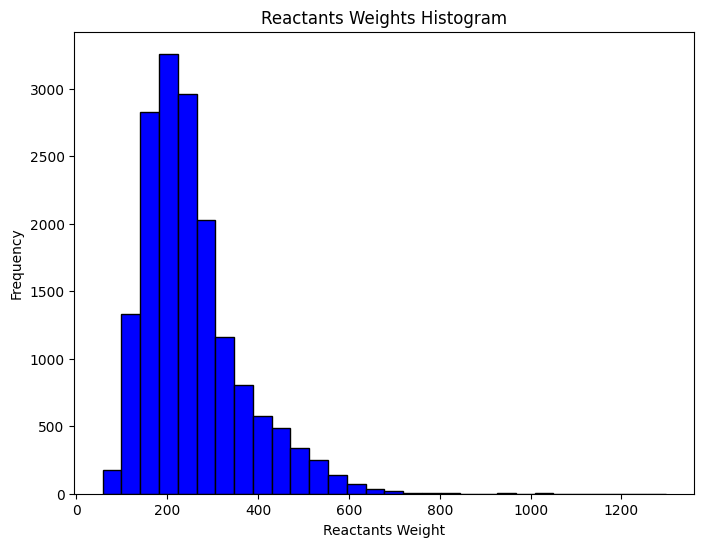

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(uspto_sample_['reactants_weights'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Reactants Weight')
plt.ylabel('Frequency')
plt.title('Reactants Weights Histogram')
plt.show()

In [22]:
uspto_sample_['reactants_weights'].quantile([0.25,0.5,0.75, 0.9, 0.95, 0.99])

0.25    179.13350
0.50    231.52900
0.75    300.31000
0.90    408.41240
0.95    474.60460
0.99    589.64552
Name: reactants_weights, dtype: float64

#### reaction type - 编号

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
uspto_sample_['reaction_type_code'] = le.fit_transform(uspto_sample_['reaction_type'])

C:\Users\22100\AppData\Local\Temp\ipykernel_95096\2568516855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uspto_sample_['reaction_type_code'] = le.fit_transform(uspto_sample_['reaction_type'])


In [24]:
le.classes_

array(['C-C bond formation', 'acylation and related processes',
       'deprotections', 'functional group addition (FGA)',
       'functional group interconversion',
       'heteroatom alkylation and arylation', 'heterocycle formation',
       'oxidations', 'protections', 'reductions'], dtype=object)

#### 2dim histogram

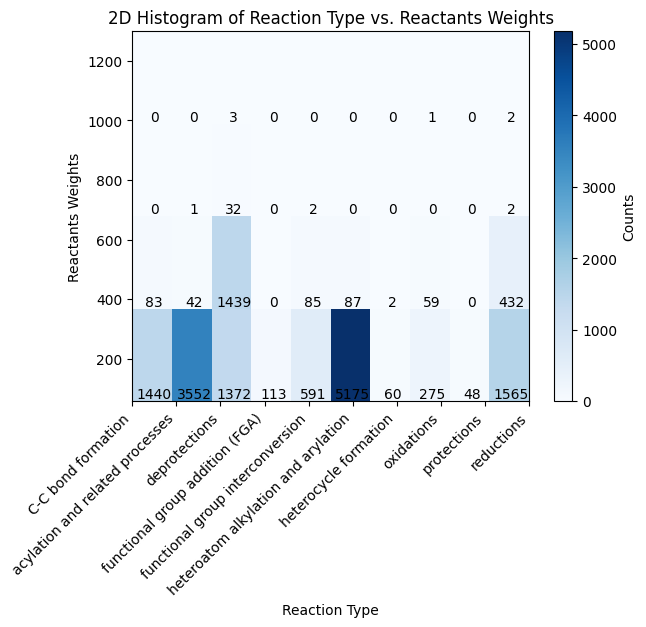

In [25]:
# 绘制二维直方图
import numpy as np
hist, xedges, yedges = np.histogram2d(uspto_sample_['reaction_type_code'], uspto_sample_['reactants_weights'], bins=(10, 4))
fig, ax = plt.subplots()
pcm = ax.pcolormesh(xedges, yedges, hist.T, cmap='Blues')
plt.colorbar(pcm, label='Counts')
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        ax.text(xedges[i] + 0.5, yedges[j], int(hist[i, j]),
                color='black', ha='center', va='bottom', fontsize=10)
                
encoded_reaction_types = le.inverse_transform(range(len(le.classes_)))
ax.set_xticks(range(len(encoded_reaction_types)))
ax.set_xticklabels(encoded_reaction_types, rotation=45, ha='right')

plt.xlabel('Reaction Type')
plt.ylabel('Reactants Weights')
plt.title('2D Histogram of Reaction Type vs. Reactants Weights')
plt.show()

### Sampling Process!!!

In [26]:
uspto_sample_['reactants_Weights_code'] = pd.cut(uspto_sample_['reactants_weights'], bins=6, labels=[0,1,2,3,4,5])

C:\Users\22100\AppData\Local\Temp\ipykernel_95096\460490193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uspto_sample_['reactants_Weights_code'] = pd.cut(uspto_sample_['reactants_weights'], bins=6, labels=[0,1,2,3,4,5])


In [33]:
uspto_sample_

,reactants,reagents,products,reaction_type,reactants_fg,products_fg,reactants_weights,reaction_type_code,reactants_Weights_code
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation,"['CN', 'O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1']",['CNc1ccc(C(=O)O)cc1[N+](=O)[O-]'],116.3115,5,0
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation,"['CC(N)c1ccc(F)c(Cl)c1', 'O=C(N1CCc2ccc(Cl)c(O...",['CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc...,299.6760,5,1
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,deprotections,['CC(=O)Nc1ccc(COC(C)=O)cc1'],['CC(=O)Nc1ccc(CO)cc1'],207.2290,2,0
5,CNC.Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1,CO,CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1,heteroatom alkylation and arylation,"['CNC', 'Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1']",['CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1'],172.3365,5,0
6,CCOC(=O)c1ccc(F)cc1OC.Oc1ccc(Br)c(C2OCCO2)c1,CCOC(C)=O.CS(C)=O.O=C([O-])[O-].[K+].[K+],CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC,heteroatom alkylation and arylation,"['CCOC(=O)c1ccc(F)cc1OC', 'Oc1ccc(Br)c(C2OCCO2...",['CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC'],221.6325,5,0
...,...,...,...,...,...,...,...,...,...
31740,CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C.CCC=O,C1CCOC1.CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O.C...,CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1,heteroatom alkylation and arylation,"['CC1(C)CC(c2ccccc2N2CCNCC2)CC1(C)C', 'CCC=O']",['CCCN1CCN(c2ccccc2C2CC(C)(C)C(C)(C)C2)CC1'],172.2715,5,0
31741,CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C.COC(=O)c1cc(I...,C1COCCO1.Cl[Pd]Cl.c1ccc(P(c2ccccc2)c2ccccc2)cc...,COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N,C-C bond formation,"['CCCC[Sn](CCCC)(CCCC)c1ccnn1C(C)C', 'COC(=O)c...",['COC(=O)c1cc(-c2ccnn2C(C)C)c(C(C)F)cc1N'],361.1580,0,1
31742,Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1.O=C1CSC(=O)N1,C1CCNCC1.CN(C)C=O,Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1,C-C bond formation,"['Cc1cc(NC2CC2)n2nc(C)c(C=O)c2n1', 'O=C1CSC(=O...",['Cc1cc(NC2CC2)n2nc(C)c(C=C3SC(=O)NC3=O)c2n1'],173.7000,0,0
31743,CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,C1CCOC1.CO.Cl.O.[Na+].[OH-],CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c(C...,deprotections,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,['CCCc1ccc(OCc2ccc(OCc3nc(-c4ccccc4)oc3C)cc2)c...,485.5800,2,2


In [34]:
import pandas as pd
import random


def select_rows(group):
    rows = []
    group_b0 = group[group['reactants_Weights_code'] == 0]
    group_b1 = group[group['reactants_Weights_code'] >= 1]
    
    if len(group_b0) > 0 and len(group_b1) > 0:
        rows.append(group_b0.sample(n=12))
        try:
            rows.append(group_b1.sample(n=8))
        except:
            rows.append(group_b0.sample(n=8))
    
    return pd.concat(rows)

selected_rows = uspto_sample_.groupby('reaction_type', group_keys=False).apply(select_rows)

selected_rows

,reactants,reagents,products,reaction_type,reactants_fg,products_fg,reactants_weights,reaction_type_code,reactants_Weights_code
28359,CC(C)(C)OC(=O)Nc1nc(Br)ns1.CS(=O)(=O)c1ccc(B(O...,C1COCCO1.O.[Cs+].[F-].[Pd],CC(C)(C)OC(=O)Nc1nc(-c2ccc(S(C)(=O)=O)cc2)ns1,C-C bond formation,"['CC(C)(C)OC(=O)Nc1nc(Br)ns1', 'CS(=O)(=O)c1cc...",['CC(C)(C)OC(=O)Nc1nc(-c2ccc(S(C)(=O)=O)cc2)ns1'],240.0855,0,0
8433,C=O.COC(=O)C(NCCc1cccs1)c1ccccc1Cl,Cl.ClCCl,COC(=O)C(c1ccccc1Cl)N1CCc2sccc2C1,C-C bond formation,"['C=O', 'COC(=O)C(NCCc1cccs1)c1ccccc1Cl']",['COC(=O)C(c1ccccc1Cl)N1CCc2sccc2C1'],169.9220,0,0
20397,C#CCNC(=O)OC(C)(C)C.COC(=O)c1ccc(Br)s1,CC#N.CCN(CC)CC.CCOC(C)=O.[Cu]I,COC(=O)c1ccc(C#CCNC(=O)OC(C)(C)C)s1,C-C bond formation,"['C#CCNC(=O)OC(C)(C)C', 'COC(=O)c1ccc(Br)s1']",['COC(=O)c1ccc(C#CCNC(=O)OC(C)(C)C)s1'],188.1360,0,0
10679,CC(C)(C)OC(=O)Nc1ccccc1F.CN(C)C=O,CCOCC.Cc1ccccc1.O.[Li]C(C)(C)C,CC(C)(C)OC(=O)Nc1c(F)cccc1C=O,C-C bond formation,"['CC(C)(C)OC(=O)Nc1ccccc1F', 'CN(C)C=O']",['CC(C)(C)OC(=O)Nc1c(F)cccc1C=O'],142.1655,0,0
15532,CCOC(=O)CC#N.O=C(c1ccc(F)cc1)c1ccc(F)cc1,CC(=O)O.NCCC(=O)O.c1ccccc1,CCOC(=O)C(C#N)=C(c1ccc(F)cc1)c1ccc(F)cc1,C-C bond formation,"['CCOC(=O)CC#N', 'O=C(c1ccc(F)cc1)c1ccc(F)cc1']",['CCOC(=O)C(C#N)=C(c1ccc(F)cc1)c1ccc(F)cc1'],165.6590,0,0
...,...,...,...,...,...,...,...,...,...
15697,Cc1cc(Cl)ccc1Oc1ncc([N+](=O)[O-])cc1C,CCO.[H][H].[OH-].[OH-].[Pd+2],Cc1cc(Cl)ccc1Oc1ncc(N)cc1C,reductions,['Cc1cc(Cl)ccc1Oc1ncc([N+](=O)[O-])cc1C'],['Cc1cc(Cl)ccc1Oc1ncc(N)cc1C'],278.6950,9,1
29332,CC(=O)N1CCC2(CC1)Cc1ccc([N+](=O)[O-])cc1C2=O,CC(=O)O.Cl.O.O=C([O-])O.[Cl-].[Cl-].[Cl-].[Na+...,CC(=O)N1CCC2(CC1)Cc1ccc(N)cc1C2=O,reductions,['CC(=O)N1CCC2(CC1)Cc1ccc([N+](=O)[O-])cc1C2=O'],['CC(=O)N1CCC2(CC1)Cc1ccc(N)cc1C2=O'],288.3030,9,1
12472,O=[N+]([O-])c1cc(Br)ccc1SCCCCl,CO,Nc1cc(Br)ccc1SCCCCl,reductions,['O=[N+]([O-])c1cc(Br)ccc1SCCCCl'],['Nc1cc(Br)ccc1SCCCCl'],310.6000,9,1
9044,CC(C)c1cc(C#N)cc2nc(-c3ccc(C(=O)NCC4(C)CN(c5cc...,C1CCOC1.CO.[H][H],CC(C)c1cc(C#N)cc2nc(-c3ccc(C(=O)NCC4(C)CN(c5cc...,reductions,['CC(C)c1cc(C#N)cc2nc(-c3ccc(C(=O)NCC4(C)CN(c5...,['CC(C)c1cc(C#N)cc2nc(-c3ccc(C(=O)NCC4(C)CN(c5...,540.5360,9,2


In [35]:
func_groups = FuncGroups()

selected_rows['reactants_functional_groups'] = selected_rows['reactants'].apply(func_groups.functional_groups)
selected_rows['products_functional_groups'] = selected_rows['products'].apply(func_groups.functional_groups)


In [40]:
selected_rows[['reactants','reagents','products','reactants_functional_groups','products_functional_groups','reaction_type']].head(5)


,reactants,reagents,products,reactants_functional_groups,products_functional_groups,reaction_type
28359,CC(C)(C)OC(=O)Nc1nc(Br)ns1.CS(=O)(=O)c1ccc(B(O...,C1COCCO1.O.[Cs+].[F-].[Pd],CC(C)(C)OC(=O)Nc1nc(-c2ccc(S(C)(=O)=O)cc2)ns1,"ketones, amides, alcohol groups, methyl sulfon...","ketones, amides, methyl sulfonyl, t-butyl",C-C bond formation
8433,C=O.COC(=O)C(NCCc1cccs1)c1ccccc1Cl,Cl.ClCCl,COC(=O)C(c1ccccc1Cl)N1CCc2sccc2C1,"esters, ketones, carbonyl methylester, halogen...","esters, ketones, carbonyl methylester, halogen...",C-C bond formation
20397,C#CCNC(=O)OC(C)(C)C.COC(=O)c1ccc(Br)s1,CC#N.CCN(CC)CC.CCOC(C)=O.[Cu]I,COC(=O)c1ccc(C#CCNC(=O)OC(C)(C)C)s1,"esters, ketones, amides, carbonyl methylester,...","esters, ketones, amides, carbonyl methylester,...",C-C bond formation
10679,CC(C)(C)OC(=O)Nc1ccccc1F.CN(C)C=O,CCOCC.Cc1ccccc1.O.[Li]C(C)(C)C,CC(C)(C)OC(=O)Nc1c(F)cccc1C=O,"ketones, amides, halogens, t-butyl","aldehydes, ketones, amides, halogens, t-butyl",C-C bond formation
15532,CCOC(=O)CC#N.O=C(c1ccc(F)cc1)c1ccc(F)cc1,CC(=O)O.NCCC(=O)O.c1ccccc1,CCOC(=O)C(C#N)=C(c1ccc(F)cc1)c1ccc(F)cc1,"esters, ketones, cyano, halogens, ethoxy, nitr...","esters, ketones, cyano, halogens, ethoxy, nitr...",C-C bond formation


In [37]:
selected_rows.to_csv('fg_sample_data_0911_200.csv')

# Result

In [57]:
res = pd.read_csv('sample1_agent_result-4.csv')
res

,reactants,reagents,result
0,N#Cc1ccc(N2CCC(=O)CC2)cc1.[Mg+]Cc1ccccc1,C1CCOC1.[Cl-],The product of the reaction is C1CCOC1.Cl.N#Cc...
1,Nc1cccc(Br)c1.O=CO,CC(=O)OC(C)=O.Cc1ccccc1,The main product of the reaction is the acetan...
2,CC(C)c1ccc2c(Nc3cc(N)ccc3Sc3ccc(NC(=O)OC(C)(C)...,CN(C)C(On1nnc2cccnc21)=[N+](C)C.CS(C)=O.F[P-](...,"The predicted product SMILES is ""CC(C)c1ccc2c(..."
3,CCOC(=O)c1cc(C(C)(C)C)nn1CC(=O)N(C)C,C1CCOC1.O.[Li+].[OH-],The product of the reaction is C1CCOC1.CC.CN(C...


In [60]:
res1 = pd.read_csv('sample1_agent_result-4-1.csv')
res1

,reactants,reagents,result
0,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)OC(C)(C)C)CO3)cc1,CCCCCC.CCOC(C)=O.Cl,The product of the reaction is CC(C)C.CCCCCC.C...
1,CC(=O)c1ccc(C)cc1.O=C1CCC(=O)N1Br,CC(C)(C#N)N=NC(C)(C)C#N.ClC(Cl)(Cl)Cl,The products of the reaction are CC(=O)c1ccc(C...
2,Cc1nc2c(=O)n(-c3ccc(Cl)cc3)c(-c3ccc(-c4ccccc4)...,CC(C)(C#N)N=NC(C)(C)C#N.ClC(Cl)(Cl)Cl,The main product SMILES are: Br.CC(C)(C#N)N=NC...
3,CCOC(=O)c1nc2ccc(C)cc2c(Cl)c1C,CCN(CC)CC.CCOC(C)=O,The main product of the reaction is CCOC(=O)c1...
4,CCN.CSc1c(Cl)nc(Cl)nc1Cl,CCC(C)=O.O,The main product is likely to be the imine for...
5,CC(C)(C)OC(=O)N1CCC(=O)CC1.C[S+](C)(C)=O,CN(C)C=O.[H-].[I-].[Na+],The product of the reaction is CC(C)(C)OC(=O)N...
6,CCOC(=O)Cn1nnc(-c2nnc(Br)s2)n1,Cl.N#Cc1nnc(Br)s1.O.[N-]=[N+]=[N-].[Na+],The product of the reaction is CCOC(=O)Cn1nnc(...
7,CCCCc1nc(C)n(-c2cccc(C(C)O)c2)c(=O)c1Cc1ccc(-c...,CC#N.CCOC(C)=O.O.O=S([O-])([O-])=S.[Na+].[Na+],The predicted product SMILES are CC=O.CCCCc1nc...
8,COCCl.Oc1ccc(I)cc1,CC(C)(C)[O-].CN(C)C=O.O.[K+],The main product SMILES are C.C.C=O.CC(C)(C)O....
9,CNc1nccc(-c2cc(NC3CCNCC3)c3cc(OC)ccc3c2)n1.O=C...,C1CCOC1.CCN(C(C)C)C(C)C.CN(C)C=O,"The product of the reaction is ""C1CCOC1.CCN(C(..."


In [61]:
# 上下合并res和res1
res2 = pd.concat([res, res1], axis=0)


In [64]:
rse_merge = pd.merge(res2,uspto_sample_,  how='inner', on=['reactants','reagents'])

In [65]:
# 添加一列，标记是否包含products
rse_merge['agent_answer_contains_product'] = rse_merge.apply(lambda row: row['products'] in row['result'], axis=1)
rse_merge

,reactants,reagents,result,products,reaction_type,reactants_weights,reaction_type_code,reactants_Weights_code,contains_product
0,N#Cc1ccc(N2CCC(=O)CC2)cc1.[Mg+]Cc1ccccc1,C1CCOC1.[Cl-],The product of the reaction is C1CCOC1.Cl.N#Cc...,N#Cc1ccc(N2CCC(O)(Cc3ccccc3)CC2)cc1,C-C bond formation,157.8395,0,0,True
1,Nc1cccc(Br)c1.O=CO,CC(=O)OC(C)=O.Cc1ccccc1,The main product of the reaction is the acetan...,O=CNc1cccc(Br)c1,acylation and related processes,109.0250,1,0,False
2,CC(C)c1ccc2c(Nc3cc(N)ccc3Sc3ccc(NC(=O)OC(C)(C)...,CN(C)C(On1nnc2cccnc21)=[N+](C)C.CS(C)=O.F[P-](...,"The predicted product SMILES is ""CC(C)c1ccc2c(...",CC(C)c1ccc2c(Nc3cccc(C(=O)Nc4ccc(Sc5ccc(NC(=O)...,acylation and related processes,405.4925,1,1,True
3,CCOC(=O)c1cc(C(C)(C)C)nn1CC(=O)N(C)C,C1CCOC1.O.[Li+].[OH-],The product of the reaction is C1CCOC1.CC.CN(C...,CN(C)C(=O)Cn1nc(C(C)(C)C)cc1C(=O)O,deprotections,281.3560,2,1,True
4,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)OC(C)(C)C)CO3)cc1,CCCCCC.CCOC(C)=O.Cl,The product of the reaction is CC(C)C.CCCCCC.C...,Cc1ccc(-c2ccc3c(c2)C=C(C(=O)O)CO3)cc1,deprotections,322.4040,2,1,False
5,CC(=O)c1ccc(C)cc1.O=C1CCC(=O)N1Br,CC(C)(C#N)N=NC(C)(C)C#N.ClC(Cl)(Cl)Cl,The products of the reaction are CC(=O)c1ccc(C...,CC(=O)c1ccc(CBr)cc1,functional group addition (FGA),156.0815,3,0,True
6,Cc1nc2c(=O)n(-c3ccc(Cl)cc3)c(-c3ccc(-c4ccccc4)...,CC(C)(C#N)N=NC(C)(C)C#N.ClC(Cl)(Cl)Cl,The main product SMILES are: Br.CC(C)(C#N)N=NC...,O=c1c2nc(CBr)n(-c3ccccc3)c2nc(-c2ccc(-c3ccccc3...,functional group addition (FGA),333.4815,3,1,False
7,CCOC(=O)c1nc2ccc(C)cc2c(Cl)c1C,CCN(CC)CC.CCOC(C)=O,The main product of the reaction is CCOC(=O)c1...,CCOC(=O)c1nc2ccc(C)cc2cc1C,functional group interconversion,263.7240,4,0,True
8,CCN.CSc1c(Cl)nc(Cl)nc1Cl,CCC(C)=O.O,The main product is likely to be the imine for...,CCNc1nc(Cl)c(SC)c(Cl)n1,heteroatom alkylation and arylation,137.3020,5,0,False
9,CC(C)(C)OC(=O)N1CCC(=O)CC1.C[S+](C)(C)=O,CN(C)C=O.[H-].[I-].[Na+],The product of the reaction is CC(C)(C)OC(=O)N...,CC(C)(C)OC(=O)N1CCC2(CC1)CO2,heterocycle formation,146.2105,6,0,True


In [66]:
rse_merge.to_csv('sample2_agent_result_3.csv')

In [72]:
# 整理图片文件 #
import os
from datetime import datetime
import shutil

folder_path = "image"

files = os.listdir(folder_path)
files.sort(key=lambda x: os.path.getmtime(os.path.join(folder_path, x)))

group_size = 4

file_groups = [files[i:i + group_size] for i in range(0, len(files), group_size)]

# for group_idx, group in enumerate(file_groups, start=1):
#     print(f"Group {group_idx}: {group}")

base_target_folder = "image/sample_image"

for group_idx, group in enumerate(file_groups, start=1):
    target_folder = os.path.join(base_target_folder, f"Group_{group_idx}")
    os.makedirs(target_folder, exist_ok=True)
    
    for file in group:
        source_file_path = os.path.join(folder_path, file)
        target_file_path = os.path.join(target_folder, file)
        shutil.move(source_file_path, target_file_path)
        


#  Ward/RDKIT 聚类

In [32]:
from rdkit import Chem
uspto_sample_['reactants_mol'] = uspto_sample_['reactants'].apply(lambda x: Chem.MolFromSmiles(x))

C:\Users\22100\AppData\Local\Temp\ipykernel_38356\2984807086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uspto_sample_['reactants_mol'] = uspto_sample_['reactants'].apply(lambda x: Chem.MolFromSmiles(x))


In [33]:
uspto_sample_.head()

,reactants,reagents,products,reaction_type,reactants_mol
0,CN.O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,O,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],heteroatom alkylation and arylation,<rdkit.Chem.rdchem.Mol object at 0x000002891B9...
2,CC(N)c1ccc(F)c(Cl)c1.O=C(N1CCc2ccc(Cl)c(OS(=O)...,NC1CCc2cc(F)ccc21,CC(Nc1c(Cl)ccc2c1CCN(C(=O)C(F)(F)F)CC2)c1ccc(F...,heteroatom alkylation and arylation,<rdkit.Chem.rdchem.Mol object at 0x000002891B9...
4,CC(=O)Nc1ccc(COC(C)=O)cc1,C1CCOC1.[Li+].[OH-],CC(=O)Nc1ccc(CO)cc1,deprotections,<rdkit.Chem.rdchem.Mol object at 0x000002891B9...
5,CNC.Clc1ccc(C2CCc3c(Cl)nc(Cl)nc32)cc1,CO,CN(C)c1nc(Cl)nc2c1CCC2c1ccc(Cl)cc1,heteroatom alkylation and arylation,<rdkit.Chem.rdchem.Mol object at 0x000002891B9...
6,CCOC(=O)c1ccc(F)cc1OC.Oc1ccc(Br)c(C2OCCO2)c1,CCOC(C)=O.CS(C)=O.O=C([O-])[O-].[K+].[K+],CCOC(=O)c1ccc(Oc2ccc(Br)c(C3OCCO3)c2)cc1OC,heteroatom alkylation and arylation,<rdkit.Chem.rdchem.Mol object at 0x000002891B9...


In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

morgan_fp = [AllChem.GetMorganFingerprintAsBitVect(x,2,2048) for x in uspto_sample_['reactants_mol']]
dis_matrix = [DataStructs.BulkTanimotoSimilarity(morgan_fp[i], morgan_fp[:18974],returnDistance=True) for i in range(18974)]
dis_array = np.array(dis_matrix)

In [39]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=4)
ward.fit(dis_array)
pd.value_counts(ward.labels_)

f:\Anaconda\envs\llm\lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


3    7396
0    5419
1    4209
2    1950
Name: count, dtype: int64

C:\Users\22100\AppData\Local\Temp\ipykernel_38356\859366262.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('tab10', 4)  # 根据聚类数量选择颜色映射


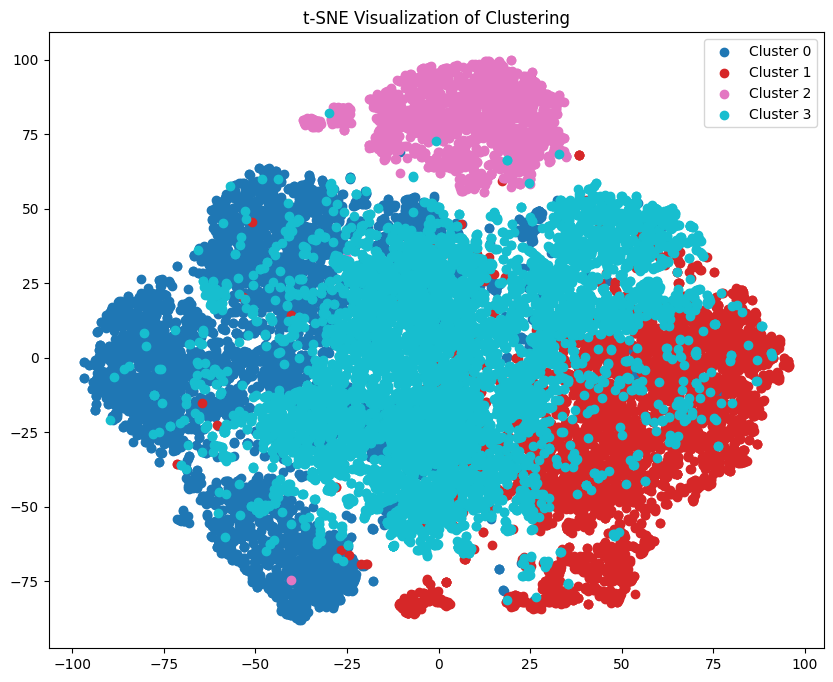

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(dis_array)

tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = ward.labels_

plt.figure(figsize=(10, 8))
palette = plt.cm.get_cmap('tab10', 4) 
for cluster in range(4): 
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], color=palette(cluster), label=f'Cluster {cluster}')

plt.title('t-SNE Visualization of Clustering')
plt.legend()
plt.show()

<Axes: xlabel='reaction_type'>

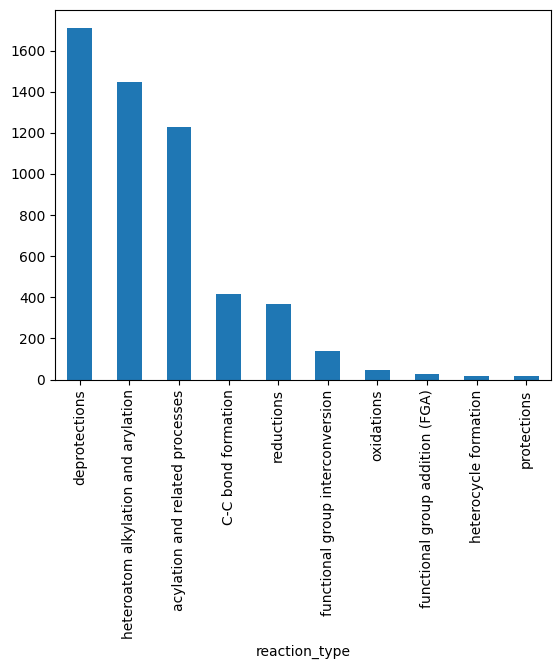

In [45]:
uspto_sample_[ward.labels_ == 0].value_counts('reaction_type').plot(kind='bar')

<Axes: xlabel='reaction_type'>

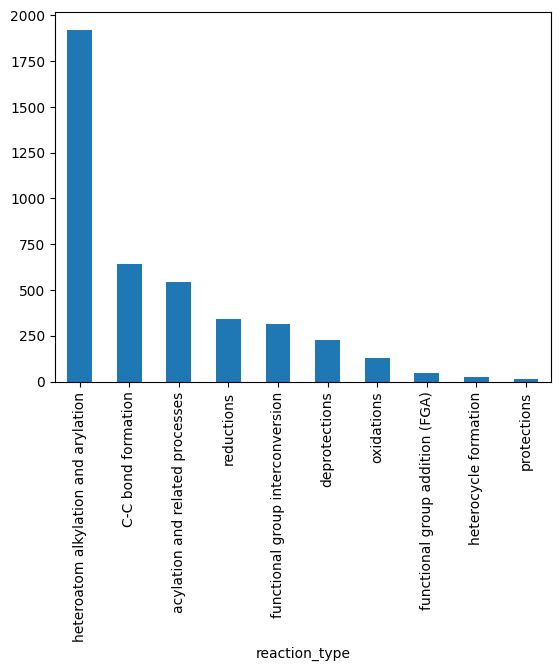

In [47]:
uspto_sample_[ward.labels_ == 1].value_counts('reaction_type').plot(kind='bar')

<Axes: xlabel='reaction_type'>

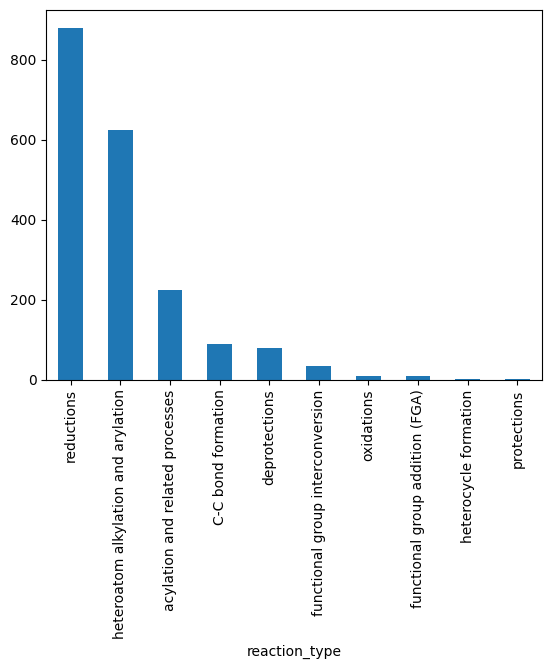

In [48]:
uspto_sample_[ward.labels_ == 2].value_counts('reaction_type').plot(kind='bar')

<Axes: xlabel='reaction_type'>

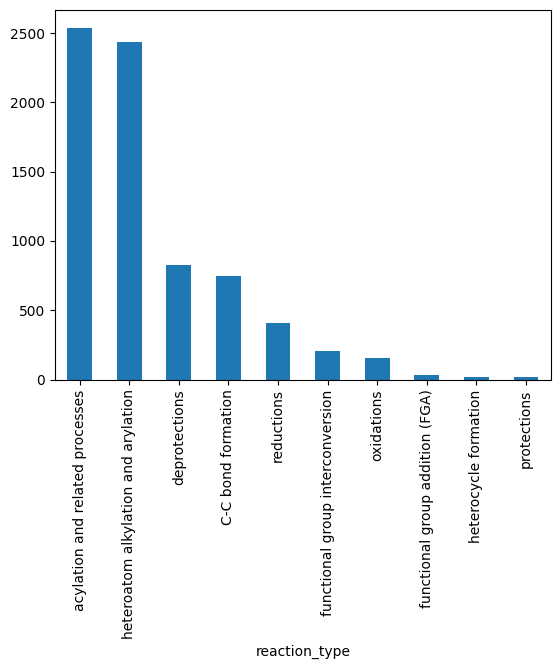

In [49]:
uspto_sample_[ward.labels_ == 3].value_counts('reaction_type').plot(kind='bar')

In [ ]:
from rdkit.Chem import Draw

ward_library = {i: [] for i in range(6)}
for n,j in enumerate(ward.labels_):
    ward_library[j].append(mols_free[n])
selected_compounds = [np.random.choice(ward_library[i]) for i in range(6)]
Draw.MolsToGridImage(selected_compounds, molsPerRow=3,subImgSize=(300, 300), legends=["Group"+ ': ' + str(i) for i in range(6)])


f:\Anaconda\envs\llm\lib\site-packages\scipy\cluster\hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Text(0.5, 1.0, 'Dendrogram for Ward method')

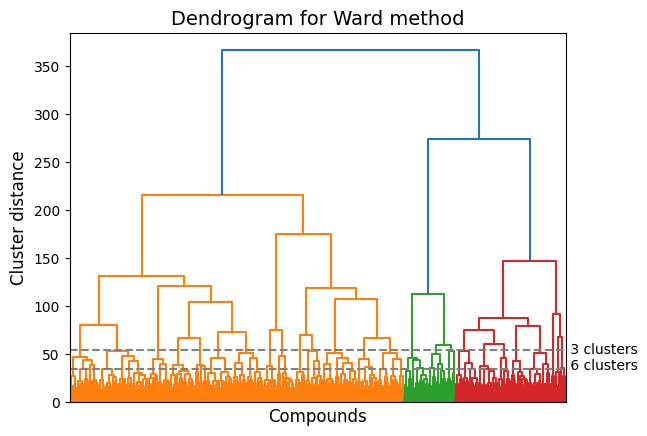

In [36]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

linked_array = hierarchy.ward(dis_array)
hierarchy.dendrogram(linked_array)
ax = plt.gca()
bounds = ax.get_xbound()
# ax.plot(bounds, [34.5,34.5], '--', c='gray')
# ax.plot(bounds, [55,55], '--', c='gray')
# ax.text(bounds[1], 55, ' 3 clusters', va='center')
# ax.text(bounds[1], 34.5, ' 6 clusters')
plt.xlabel('Compounds', fontsize=12)
plt.xticks([])
plt.ylabel('Cluster distance', fontsize=12)
plt.title('Dendrogram for Ward method', fontsize=14)
